In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/gastos_2003_2022.csv", dtype=str, encoding='cp850', delimiter=';')
df.head()

DATA PGTO    CPF SERVIDOR CPF/CNPJ FORNECEDOR  \
0  02/01/2003  ***.010.008-**      31349202000177   
1  02/01/2003  ***.010.008-**      31349202000177   
2  02/01/2003  ***.868.251-**      31349202000177   
3  03/01/2003  ***.004.131-**      00592717000170   
4  03/01/2003  ***.004.131-**      00839308000125   

                                     NOME FORNECEDOR          VALOR TIPO  \
0                        JW TRANSPORTADORA TURÍSTICA   R$ 1.696,90     D   
1                        JW TRANSPORTADORA TURÍSTICA   R$ 1.336,60     D   
2                        JW TRANSPORTADORA TURÍSTICA   R$ 1.396,43     D   
3                                    FLORES ALVORADA   R$ 8.585,00     C   
4  CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...     R$ 251,50     C   

                         SUBELEMENTO DE DESPESA  \
0                LOCACAO DE MEIOS DE TRANSPORTE   
1                LOCACAO DE MEIOS DE TRANSPORTE   
2                LOCACAO DE MEIOS DE TRANSPORTE   
3  OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA   
4   MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO   

                                                CDIC  
0  00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N  
1  00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N  
2  00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N  
3  00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N  
4  00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N

In [6]:
#Verificar o total de linhas e colunas
df.shape

(113342, 8)

In [7]:
#Veriricar informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113342 entries, 0 to 113341
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DATA PGTO               113342 non-null  object
 1   CPF SERVIDOR            113340 non-null  object
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object
 3   NOME FORNECEDOR         113340 non-null  object
 4   VALOR                   113340 non-null  object
 5   TIPO                    113340 non-null  object
 6   SUBELEMENTO DE DESPESA  113340 non-null  object
 7   CDIC                    113340 non-null  object
dtypes: object(8)
memory usage: 6.9+ MB


In [8]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                2
CPF/CNPJ FORNECEDOR       436
NOME FORNECEDOR             2
VALOR                       2
TIPO                        2
SUBELEMENTO DE DESPESA      2
CDIC                        2
dtype: int64

In [9]:
#Verificar o percentual dos dados nulos
(df.isnull().sum() / len(df)) * 100

DATA PGTO                 0.000000
CPF SERVIDOR              0.001765
CPF/CNPJ FORNECEDOR       0.384676
NOME FORNECEDOR           0.001765
VALOR                     0.001765
TIPO                      0.001765
SUBELEMENTO DE DESPESA    0.001765
CDIC                      0.001765
dtype: float64

In [10]:
#Remoção de dados com valores negativos
df = df.dropna(subset=["VALOR"])

In [11]:
#Verificar a quantidade de dados nulos por coluna
df.isnull().sum()

DATA PGTO                   0
CPF SERVIDOR                0
CPF/CNPJ FORNECEDOR       434
NOME FORNECEDOR             0
VALOR                       0
TIPO                        0
SUBELEMENTO DE DESPESA      0
CDIC                        0
dtype: int64

In [12]:
# Convertendo a coluna 'DATA PGTO' para datetime
df['DATA PGTO'] = pd.to_datetime(df['DATA PGTO'], format='%d/%m/%Y')  # Ajuste o formato conforme necessário

# Criar colunas separadas para o dia, mês e ano
df['DIA PGTO'] = df['DATA PGTO'].dt.day
df['MES PGTO'] = df['DATA PGTO'].dt.month
df['ANO PGTO'] = df['DATA PGTO'].dt.year

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113340 non-null  object        
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 9.1+ MB
None


DATA PGTO    CPF SERVIDOR CPF/CNPJ FORNECEDOR  \
0      2003-01-02  ***.010.008-**      31349202000177   
1      2003-01-02  ***.010.008-**      31349202000177   
2      2003-01-02  ***.868.251-**      31349202000177   
3      2003-01-03  ***.004.131-**      00592717000170   
4      2003-01-03  ***.004.131-**      00839308000125   
...           ...             ...                 ...   
113335 2022-12-03  ***.136.591-**      17261661005728   
113336 2022-12-03  ***.136.591-**      39879944000116   
113337 2022-12-04  ***.136.591-**      47508411094975   
113338 2022-12-04  ***.136.591-**      12550441000146   
113339 2022-12-04  ***.136.591-**      03696869000100   

                                          NOME FORNECEDOR          VALOR TIPO  \
0                             JW TRANSPORTADORA TURÍSTICA   R$ 1.696,90     D   
1                             JW TRANSPORTADORA TURÍSTICA   R$ 1.336,60     D   
2                             JW TRANSPORTADORA TURÍSTICA   R$ 1.396,43     D   
3                                         FLORES ALVORADA   R$ 8.585,00     C   
4       CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...     R$ 251,50     C   
...                                                   ...            ...  ...   
113335         OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A          179,5    C   
113336           BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS          54,95    C   
113337               COMPANHIA BRASILEIRA DE DISTRIBUIÇÃO         518,07    C   
113338                                   RESTAURANTE SOHO         330,52    C   
113339              BIG TRANS COMERCIAL DE ALIMENTOS LTDA          54,66    C   

                              SUBELEMENTO DE DESPESA  \
0                     LOCACAO DE MEIOS DE TRANSPORTE   
1                     LOCACAO DE MEIOS DE TRANSPORTE   
2                     LOCACAO DE MEIOS DE TRANSPORTE   
3       OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA   
4        MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO   
...                                              ...   
113335                   FORNECIMENTO DE ALIMENTAÇÃO   
113336                        GENEROS DE ALIMENTAÇÃO   
113337                        GENEROS DE ALIMENTAÇÃO   
113338                   FORNECIMENTO DE ALIMENTAÇÃO   
113339                        GENEROS DE ALIMENTAÇÃO   

                                                     CDIC  DIA PGTO  MES PGTO  \
0       00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
1       00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
2       00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
3       00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N         3         1   
4       00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N         3         1   
...                                                   ...       ...       ...   
113335  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         3        12   
113336  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         3        12   
113337  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   
113338  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   
113339  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   

        ANO PGTO  
0           2003  
1           2003  
2           2003  
3           2003  
4           2003  
...          ...  
113335      2022  
113336      2022  
113337      2022  
113338      2022  
113339      2022  

[113340 rows x 11 columns]

In [13]:
#Converter os valores para posterior realização de cálculos

# Remover 'R$', substituir ponto (milhar) por vazio e a vírgula por ponto (decimal)
df['VALOR'] = df['VALOR'].str.replace('R$', '')   # Remove 'R$'
df['VALOR'] = df['VALOR'].str.replace('.', '')    # Remove o separador de milhar
df['VALOR'] = df['VALOR'].str.replace(',', '.')   # Substitui a vírgula decimal por ponto

# Converter para tipo numérico (float)
df['VALOR'] = pd.to_numeric(df['VALOR'], errors='coerce')

# Verificar resultado
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB
None


DATA PGTO    CPF SERVIDOR CPF/CNPJ FORNECEDOR  \
0      2003-01-02  ***.010.008-**      31349202000177   
1      2003-01-02  ***.010.008-**      31349202000177   
2      2003-01-02  ***.868.251-**      31349202000177   
3      2003-01-03  ***.004.131-**      00592717000170   
4      2003-01-03  ***.004.131-**      00839308000125   
...           ...             ...                 ...   
113335 2022-12-03  ***.136.591-**      17261661005728   
113336 2022-12-03  ***.136.591-**      39879944000116   
113337 2022-12-04  ***.136.591-**      47508411094975   
113338 2022-12-04  ***.136.591-**      12550441000146   
113339 2022-12-04  ***.136.591-**      03696869000100   

                                          NOME FORNECEDOR    VALOR TIPO  \
0                             JW TRANSPORTADORA TURÍSTICA  1696.90    D   
1                             JW TRANSPORTADORA TURÍSTICA  1336.60    D   
2                             JW TRANSPORTADORA TURÍSTICA  1396.43    D   
3                                         FLORES ALVORADA  8585.00    C   
4       CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...   251.50    C   
...                                                   ...      ...  ...   
113335         OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A   179.50    C   
113336           BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS    54.95    C   
113337               COMPANHIA BRASILEIRA DE DISTRIBUIÇÃO   518.07    C   
113338                                   RESTAURANTE SOHO   330.52    C   
113339              BIG TRANS COMERCIAL DE ALIMENTOS LTDA    54.66    C   

                              SUBELEMENTO DE DESPESA  \
0                     LOCACAO DE MEIOS DE TRANSPORTE   
1                     LOCACAO DE MEIOS DE TRANSPORTE   
2                     LOCACAO DE MEIOS DE TRANSPORTE   
3       OUTROS SERVIÇOS DE TERCEIROS-PESSOA JURÍDICA   
4        MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO   
...                                              ...   
113335                   FORNECIMENTO DE ALIMENTAÇÃO   
113336                        GENEROS DE ALIMENTAÇÃO   
113337                        GENEROS DE ALIMENTAÇÃO   
113338                   FORNECIMENTO DE ALIMENTAÇÃO   
113339                        GENEROS DE ALIMENTAÇÃO   

                                                     CDIC  DIA PGTO  MES PGTO  \
0       00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
1       00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
2       00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N         2         1   
3       00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N         3         1   
4       00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N         3         1   
...                                                   ...       ...       ...   
113335  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         3        12   
113336  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         3        12   
113337  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   
113338  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   
113339  00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N         4        12   

        ANO PGTO  
0           2003  
1           2003  
2           2003  
3           2003  
4           2003  
...          ...  
113335      2022  
113336      2022  
113337      2022  
113338      2022  
113339      2022  

[113340 rows x 11 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113340 entries, 0 to 113339
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATA PGTO               113340 non-null  datetime64[ns]
 1   CPF SERVIDOR            113340 non-null  object        
 2   CPF/CNPJ FORNECEDOR     112906 non-null  object        
 3   NOME FORNECEDOR         113340 non-null  object        
 4   VALOR                   113324 non-null  float64       
 5   TIPO                    113340 non-null  object        
 6   SUBELEMENTO DE DESPESA  113340 non-null  object        
 7   CDIC                    113340 non-null  object        
 8   DIA PGTO                113340 non-null  int32         
 9   MES PGTO                113340 non-null  int32         
 10  ANO PGTO                113340 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 9.1+ MB


In [28]:
df.sample(5)

DATA PGTO    CPF SERVIDOR CPF/CNPJ FORNECEDOR  \
87611 2015-09-17  ***.559.816-**      09578751000164   
56091 2010-01-26  ***.582.401-**      92784537000108   
40128 2008-04-28  ***.841.461-**      08998246000106   
84028 2014-12-22  ***.543.801-**      00672600000104   
71912 2012-05-14  ***.232.581-**      00839308000125   

                                         NOME FORNECEDOR   VALOR TIPO  \
87611                                        L. PESSI ME  196.06    D   
56091  PREDIAL E ADMINISTRADORA  HOTEIS PLAZA S/A-SAN...  480.00    C   
40128              BOURBON IBIRAPUERA HOTEL & CONVENTION  413.70    C   
84028                           MERCADINHO LA PALMA LTDA  247.52    C   
71912  CRISTAL LIMPEZA - COMÉRCIO DE MATERIAIS PARA L...  998.30    C   

                            SUBELEMENTO DE DESPESA  \
87611   SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL   
56091                                  HOSPEDAGENS   
40128                                  HOSPEDAGENS   
84028                       GENEROS DE ALIMENTAÇÃO   
71912  MATERIAL DE LIMPEZA E PROD. DE HIGIENIZAÇÃO   

                                                    CDIC  DIA PGTO  MES PGTO  \
87611  00150.000581/2015-51.R.08.25/08/2015.31/12/2018.N        17         9   
56091  00150.000049/2010-29.R.08.28/12/2009.31/12/2014.N        26         1   
40128  00200.002133/2008-20.R.08.28/04/2008.31/12/2014.N        28         4   
84028  00024.000517/2014-34.R.08.26/11/2014.31/12/2018.N        22        12   
71912  00150.000767/2012-67.R.08.25/04/2012.31/12/2014.N        14         5   

       ANO PGTO  
87611      2015  
56091      2010  
40128      2008  
84028      2014  
71912      2012

Análise dos Dados

O que queremos responder?
- Despesas por período, por tipo e por subelemento
- Quais são os principais fornecedores e qual o valor total gasto com cada um deles?

- Identificar quais fornecedores recebem mais frequentemente e somar os valores para cada fornecedor.
Qual é o tipo de despesa mais recorrente e qual o valor total gasto com cada tipo?

- Analisar qual tipo de despesa (ex: locação de transporte, hospedagens) aparece com mais frequência e qual o montante gasto.

- Qual servidor realizou o maior número de transações e qual foi o valor total de suas despesas?

- Identificar o servidor (por meio do CPF oculto) que mais realizou pagamentos e o valor total associado.

- Quais são as datas com maior volume de despesas e quais os valores totais em cada data?

- Examinar as datas para identificar picos de gastos e entender em quais períodos as despesas foram mais intensas.

- Existe algum padrão de gasto com determinados fornecedores ou tipos de despesa ao longo do tempo?

- Avaliar se há recorrência mensal, semanal ou sazonal de despesas com fornecedores específicos ou tipos de despesas.

Qual o total gasto com despesas categorizadas como 'LOCACAO DE MEIOS DE TRANSPORTE'?

Somar todos os valores associados a esse subelemento de despesa para avaliar o gasto total com transporte.
Existem fornecedores que aparecem mais de uma vez em transações consecutivas?

Identificar fornecedores recorrentes e analisar se as transações seguem algum padrão específico.
Qual é a média de gasto por transação e quais são as transações que mais se afastam dessa média (maior ou menor)?

Calcular a média geral dos gastos e destacar transações que são outliers.
Quais servidores utilizaram o mesmo fornecedor em datas diferentes e qual o valor total dessas transações?

Analisar a relação entre servidores e fornecedores para identificar padrões de uso ao longo do tempo.
Qual o impacto das despesas categorizadas como 'HOSPEDAGENS' no total de gastos?

Somar todos os valores de hospedagens e comparar com o gasto total para avaliar a representatividade.
Existe alguma irregularidade no padrão de gastos, como valores muito elevados ou repetição frequente de pequenos valores?

Buscar padrões atípicos ou suspeitos que possam indicar necessidade de auditoria.
Quais são os subelementos de despesa mais comuns e qual o valor total associado a cada um?

Identificar quais subelementos têm maior frequência e quais têm maior valor agregado.
Como os gastos se distribuem entre os tipos de despesa (ex: despesas correntes vs. de capital)?

Analisar a natureza dos gastos para entender como os recursos estão sendo aplicados.
Quais são os fornecedores mais utilizados por cada servidor específico?

Relacionar servidores com seus fornecedores mais frequentes para verificar se há algum padrão.
Existe uma concentração de gastos em poucos fornecedores ou está mais distribuído?

Verificar a concentração dos valores em poucos fornecedores e entender o nível de diversificação.


In [16]:
#Despesas por ano

# Agrupar por 'ANO PGTO' e somar os valores
despesas_por_ano = df.groupby('ANO PGTO')['VALOR'].sum().reset_index()

# Exibir o resultado
print(despesas_por_ano)

    ANO PGTO       VALOR
0       2003  5327599.63
1       2004  6541238.37
2       2005  5204035.80
3       2006  4977941.73
4       2007  3857905.40
5       2008  6084616.50
6       2009  5438905.30
7       2010  6557394.19
8       2011  4587842.43
9       2012  4598570.59
10      2013  6022006.62
11      2014  9305096.62
12      2015  5706943.28
13      2016  4192262.08
14      2017  4003637.84
15      2018  4866043.60
16      2019  5382478.10
17      2020  7314318.09
18      2021  9927562.29
19      2022  4997298.75


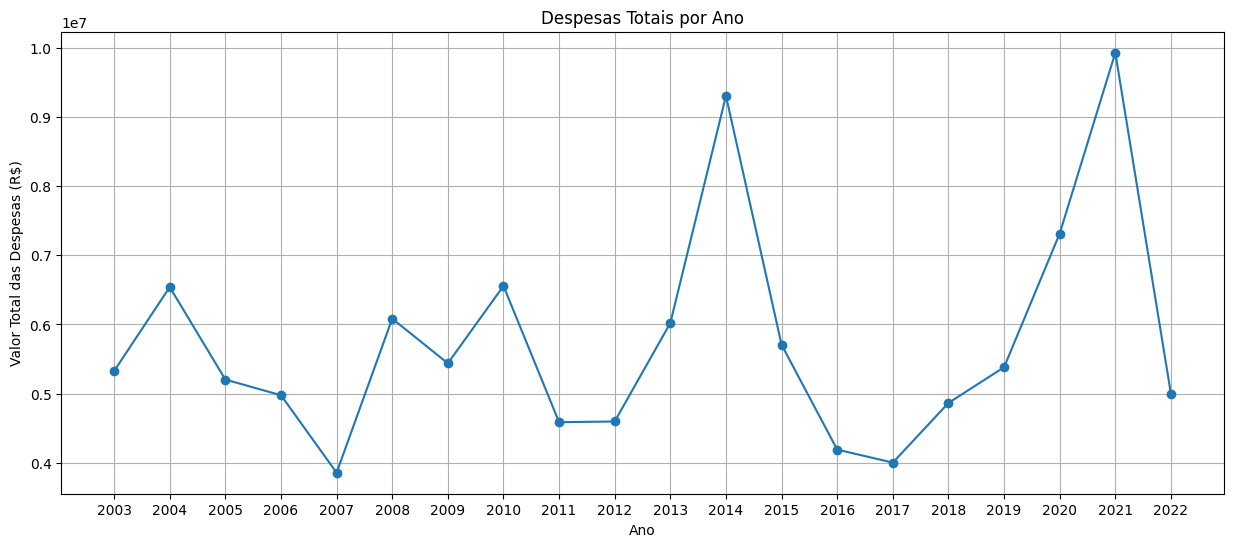

In [17]:
# Criar o gráfico de linhas
plt.figure(figsize=(15, 6))
plt.plot(despesas_por_ano['ANO PGTO'], despesas_por_ano['VALOR'], marker='o')

# Adicionar título e rótulos
plt.title('Despesas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total das Despesas (R$)')
plt.grid()
plt.xticks(despesas_por_ano['ANO PGTO'])  # Para mostrar todos os anos no eixo x

# Mostrar o gráfico
plt.show()

In [18]:
#Despesas por subelemento

# Agrupar por 'SUBELEMENTO DE DESPESA' e somar os valores
despesas_por_subelemento = df.groupby('SUBELEMENTO DE DESPESA')['VALOR'].sum().reset_index()

# Ordenar os resultados do maior para o menor (opcional)
despesas_por_subelemento = despesas_por_subelemento.sort_values(by='VALOR', ascending=False)

# Exibir o resultado
print(despesas_por_subelemento)

                         SUBELEMENTO DE DESPESA        VALOR
32                                  HOSPEDAGENS  55397350.65
31                       GENEROS DE ALIMENTAÇÃO  17150004.28
28                  FORNECIMENTO DE ALIMENTAÇÃO  14753514.55
35               LOCACAO DE MEIOS DE TRANSPORTE  11257546.49
87   SERV.DE APOIO ADMIN.,TECNICO E OPERACIONAL   8189687.60
..                                          ...          ...
5                AQUISIÇÃO DE SOFTWARES DE BASE        35.60
99                    SERVIÇOS DE ÁGUA E ESGOTO        27.25
52                           MATERIAL BIOLÓGICO        12.70
80                OUTRAS DESPESAS COM LOCOMOÇÃO        10.80
102                        SERVIÇOS JUDICIÁRIOS         2.65

[112 rows x 2 columns]


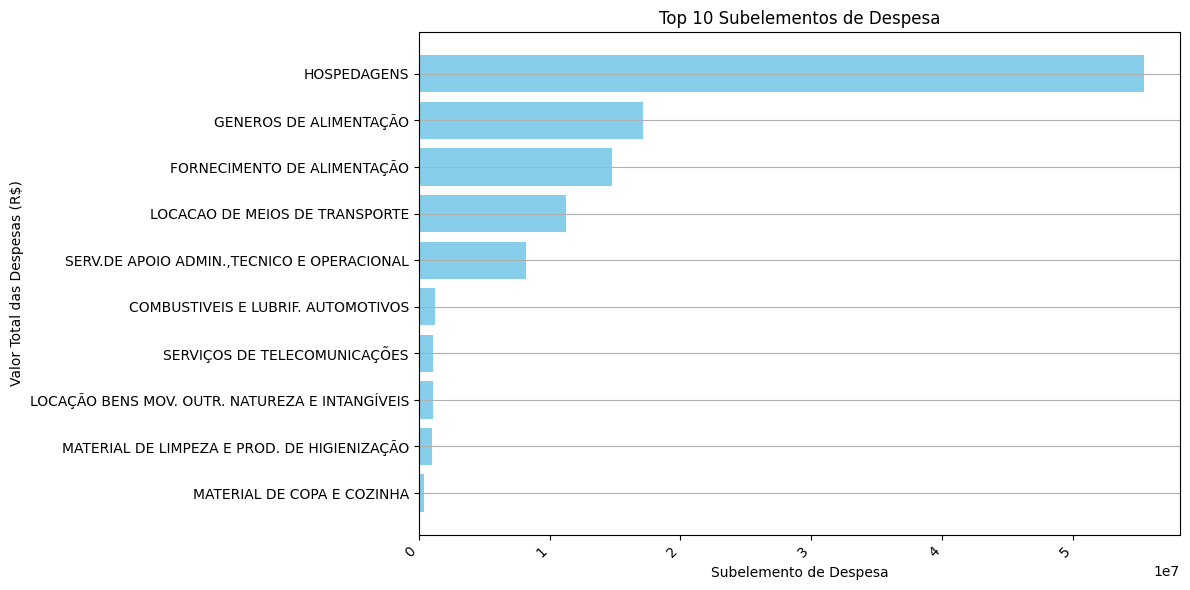

In [19]:
#TOP 10 Subelementos

# Ordenar por valor total e pegar os top 10 subelementos
top_10_subelementos = despesas_por_subelemento.sort_values(by='VALOR', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
plt.barh(top_10_subelementos['SUBELEMENTO DE DESPESA'][::-1], top_10_subelementos['VALOR'][::-1], color='skyblue')



# Adicionar título e rótulos
plt.title('Top 10 Subelementos de Despesa')
plt.xlabel('Subelemento de Despesa')
plt.ylabel('Valor Total das Despesas (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

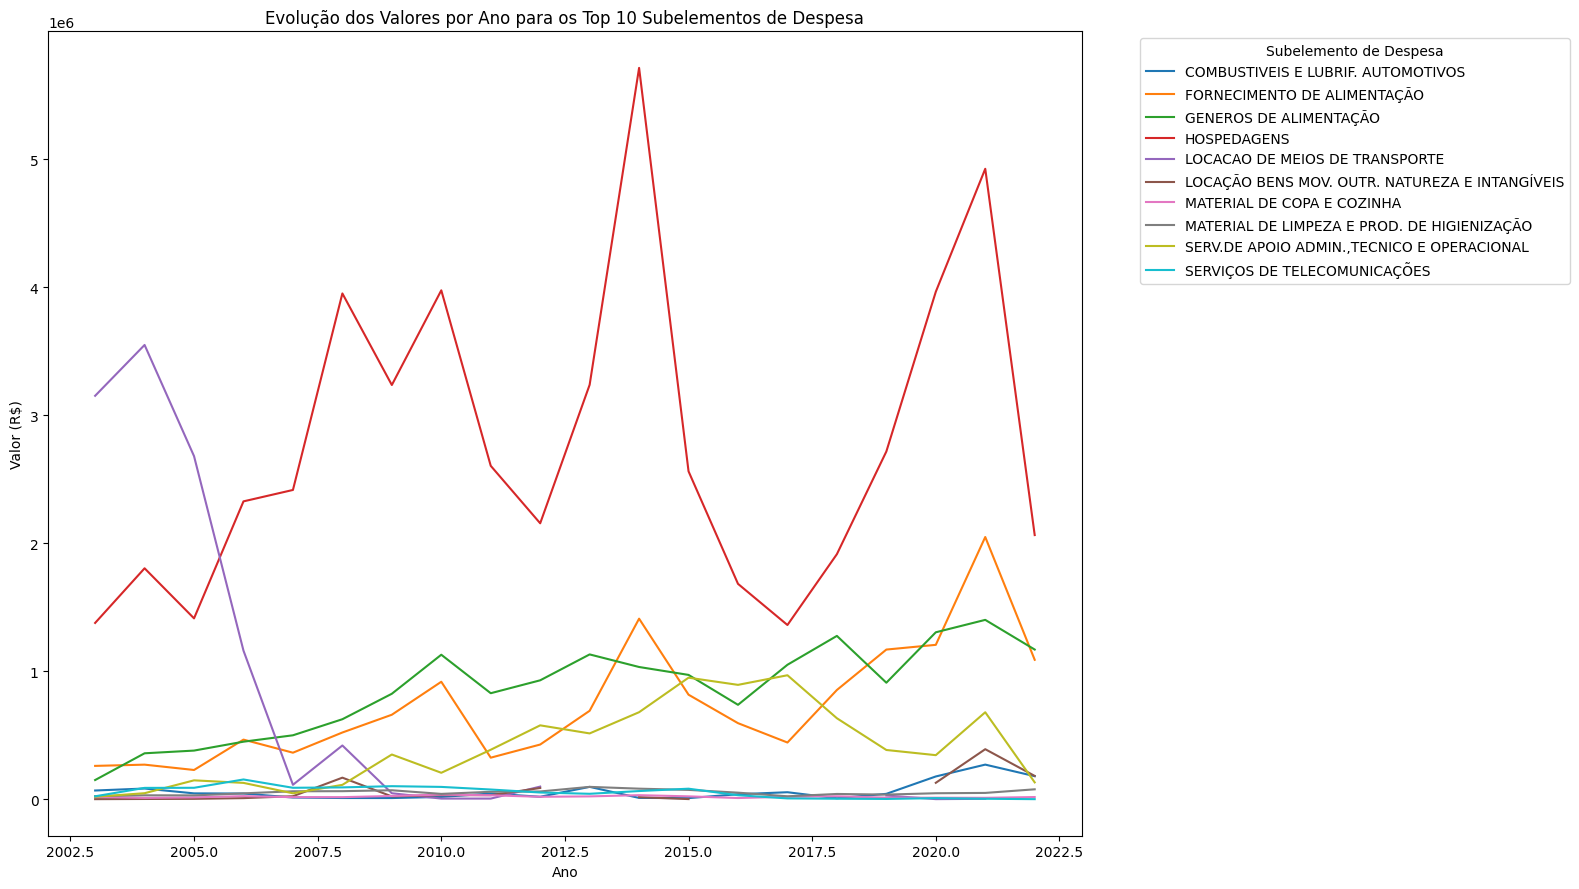

In [30]:

# Agrupar por subelemento de despesa e somar os valores para encontrar os top 10
top_subelementos = df.groupby('SUBELEMENTO DE DESPESA')['VALOR'].sum().nlargest(10).index

# Filtrar os dados para conter apenas os top 10 subelementos
df_top_subelementos = df[df['SUBELEMENTO DE DESPESA'].isin(top_subelementos)]

# Agrupar os valores por ano e subelemento de despesa
valores_por_ano_subelemento = df_top_subelementos.groupby(['ANO PGTO', 'SUBELEMENTO DE DESPESA'])['VALOR'].sum().unstack()

# Criar o gráfico de linhas
plt.figure(figsize=(16, 9))
for subelemento in valores_por_ano_subelemento.columns:
    plt.plot(valores_por_ano_subelemento.index, valores_por_ano_subelemento[subelemento], label=subelemento)

# Adicionar título e rótulos
plt.title('Evolução dos Valores por Ano para os Top 10 Subelementos de Despesa')
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.legend(title="Subelemento de Despesa", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [31]:
valores_por_ano_subelemento

SUBELEMENTO DE DESPESA  COMBUSTIVEIS E LUBRIF. AUTOMOTIVOS  \
ANO PGTO                                                     
2003                                              67655.14   
2004                                              83136.09   
2005                                              45326.42   
2006                                              44106.34   
2007                                              12736.39   
2008                                               9071.04   
2009                                               8780.67   
2010                                              17596.12   
2011                                              43891.53   
2012                                              18885.14   
2013                                              96112.65   
2014                                               9827.79   
2015                                               8319.20   
2016                                              38530.86   
2017                                              54256.95   
2018                                               7461.06   
2019                                              41668.37   
2020                                             177398.59   
2021                                             270004.79   
2022                                             179752.81   

SUBELEMENTO DE DESPESA  FORNECIMENTO DE ALIMENTAÇÃO  GENEROS DE ALIMENTAÇÃO  \
ANO PGTO                                                                      
2003                                      260009.40               149544.40   
2004                                      269720.92               358430.48   
2005                                      228073.64               379597.13   
2006                                      465260.99               449110.74   
2007                                      363090.83               499070.39   
2008                                      520905.57               624642.34   
2009                                      659688.28               823627.18   
2010                                      917330.54              1128523.43   
2011                                      324173.91               827810.18   
2012                                      426895.00               928649.07   
2013                                      690563.80              1130945.95   
2014                                     1410250.57              1032662.77   
2015                                      816238.92               970895.87   
2016                                      593844.27               737184.51   
2017                                      442593.34              1050065.43   
2018                                      853084.04              1275663.19   
2019                                     1168840.66               909907.69   
2020                                     1205741.66              1303800.19   
2021                                     2048247.97              1400886.74   
2022                                     1088960.24              1168986.60   

SUBELEMENTO DE DESPESA  HOSPEDAGENS  LOCACAO DE MEIOS DE TRANSPORTE  \
ANO PGTO                                                              
2003                     1376895.03                      3151519.52   
2004                     1803801.98                      3548778.27   
2005                     1412608.93                      2680040.27   
2006                     2326732.13                      1160372.99   
2007                     2415824.59                       112312.45   
2008                     3951275.46                       419416.29   
2009                     3235860.09                        46232.03   
2010                     3975583.93                         4581.60   
2011                     2604437.74                         4500.00   
2012                     2155381.76                        98270.07   
2013                     3237557.18         

In [25]:
#Despesas por tipo

# Agrupar por 'TIPO' e somar os valores
despesas_por_tipo = df.groupby('TIPO')['VALOR'].sum()

# Exibir o resultado
print(despesas_por_tipo)

TIPO
C    1.036233e+08
D    1.127038e+07
Name: VALOR, dtype: float64


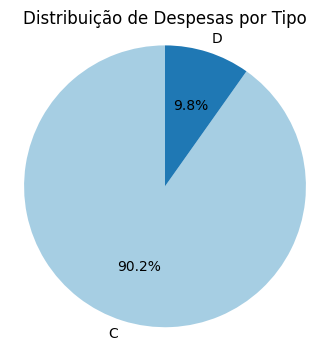

In [27]:
# Criar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(despesas_por_tipo.values, labels=despesas_por_tipo.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title('Distribuição de Despesas por Tipo')

# Garantir que o gráfico de pizza seja desenhado como um círculo
plt.axis('equal')

# Mostrar o gráfico
plt.show()

In [87]:
pip install pydantic

In [89]:
pip install ydata-profiling


In [90]:
from ydata_profiling  import ProfileReport

In [91]:
# Criar o relatório de perfil
profile = ProfileReport(df, title="Relatório de Perfil do DataFrame", explorative=True)

# Exibir o relatório no Jupyter Notebook
profile.to_notebook_iframe()

# Ou exportar o relatório para um arquivo HTML
profile.to_file("relatorio_perfil.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]